In [19]:
# import general Python packages and functions
import os
from dataclasses import dataclass
from collections import namedtuple
from itertools import compress

# import general neurophys packages
import mne_bids
import mne

# resetting directories for downloading pte
projectpath = '/Users/jeroenhabets/Research/CHARITE/projects/dyskinesia_neurophys'
datapath = os.path.join(projectpath, 'data/BIDS_Berlin_ECOG_LFP/rawdata')
codepath = os.path.join(projectpath, 'code')

os.chdir(os.path.join(codepath, 'py_neuromodulation'))
from py_neuromodulation import nm_analysis

# import group packages and functions
os.chdir(os.path.join(codepath, 'pte'))
import pte
# requirements (after installing py_neuromd): pybv, plotly, bayes_opt (bayesian-optimization),
# catboost, statannotations, numba (NUMPY <= v1.20)

os.chdir(codepath)

In [8]:
# pte.filefinder skipped

@dataclass
class SessInfo():
    """Store info about desired session"""
    
    med: str
    task: str
    pt: str = '003'

pt = '003'
med = 'On03'
task = 'Rest'
stim = 'Off'

pt3c = SessInfo(med, task, pt)

sessionInfo = namedtuple('sessionInfo', ['pt', 'med', 'task', 'stim'])
pt3 = sessionInfo(pt, med, task, stim)

filelist = os.listdir(f'{datapath}/sub-{pt3.pt}/ses-EphysMed{pt3.med}/ieeg')
sel = [f[-4:] == 'vhdr' for f in filelist]
list(compress(filelist, sel))

['sub-003_ses-EphysMedOn03_task-SelfpacedRotationR_acq-StimOff_run-01_ieeg.vhdr',
 'sub-003_ses-EphysMedOn03_task-Rest_acq-StimOff_run-01_ieeg.vhdr']

In [16]:
bidsfile = mne_bids.BIDSPath(
    root=datapath, 
    subject=pt3.pt, 
    session=f"EphysMed{pt3.med}", 
    task=pt3.task,
    acquisition=f"Stim{pt3.stim}",
    run="01")

In [13]:
bidspath

BIDSPath(
root: /Users/jeroenhabets/Research/CHARITE/projects/dyskinesia_neurophys/data/BIDS_Berlin_ECOG_LFP/rawdata
datatype: None
basename: sub-003_ses-EphysMedOn03_task-Rest_acq-StimOff_run-0)

In [17]:
raw = mne_bids.read_raw_bids(bidsfile, verbose=False)

/var/folders/7d/4ptht2m910d1y872jrgp9cq40000gp/T/ipykernel_22205/2177782018.py:1: RuntimeWarning: Did not find any events.tsv associated with sub-003_ses-EphysMedOn03_task-Rest_acq-StimOff_run-01.

The search_str was "/Users/jeroenhabets/Research/CHARITE/projects/dyskinesia_neurophys/data/BIDS_Berlin_ECOG_LFP/rawdata/sub-003/**/ieeg/sub-003_ses-EphysMedOn03*events.tsv"
  raw = mne_bids.read_raw_bids(bidsfile, verbose=False)
/var/folders/7d/4ptht2m910d1y872jrgp9cq40000gp/T/ipykernel_22205/2177782018.py:1: RuntimeWarning: Defaulting coordinate frame to unknown from coordinate system input Other
  raw = mne_bids.read_raw_bids(bidsfile, verbose=False)
/var/folders/7d/4ptht2m910d1y872jrgp9cq40000gp/T/ipykernel_22205/2177782018.py:1: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw = mne_bids.read_raw_bids(bidsfile, verbose=False)
/var/folders/7d/4ptht2m910d1y872jrgp9cq40000gp/T/ipykernel_22205/2177782018.py:1: RuntimeWarning: DigMontage

In [18]:
raw

<RawBrainVision | sub-003_ses-EphysMedOn03_task-Rest_acq-StimOff_run-01_ieeg.eeg, 23 x 2468095 (602.6 s), ~39 kB, data not loaded>

In [13]:
import mne

In [15]:
fname = r"C:\Users\richa\OneDrive - Charité - Universitätsmedizin Berlin\Data\BIDS_Berlin_ECOG_LFP\rawdata\sub-003\ses-EphysMedOff01\ieeg\sub-003_ses-EphysMedOff01_task-BlockRotationR_acq-StimOff_run-01_ieeg.vhdr"
raw = mne.io.read_raw_brainvision(vhdr_fname=fname)

Extracting parameters from C:\Users\richa\OneDrive - Charité - Universitätsmedizin Berlin\Data\BIDS_Berlin_ECOG_LFP\rawdata\sub-003\ses-EphysMedOff01\ieeg\sub-003_ses-EphysMedOff01_task-BlockRotationR_acq-StimOff_run-01_ieeg.vhdr...
Setting channel info structure...


In [16]:
raw

<RawBrainVision | sub-003_ses-EphysMedOff01_task-BlockRotationR_acq-StimOff_run-01_ieeg.eeg, 26 x 554415 (403.2 s), ~31 kB, data not loaded>

In [ ]:
mne_bids.write_raw_bids(raw, path=)

In [39]:
file = file_reader.files[4]

In [40]:
raw = mne_bids.read_raw_bids(file)

Extracting parameters from C:\Users\richa\OneDrive - Charité - Universitätsmedizin Berlin\PROJECT_Motor_Onset_Prediction_RESULTS\pipeline-motor_intention_pred_2021-07-02\sub-002\ses-EphysMedOff03\ieeg\sub-002_ses-EphysMedOff03_task-SelfpacedRotationR_acq-StimOn_run-01_ieeg.vhdr...
Setting channel info structure...
Reading events from C:\Users\richa\OneDrive - Charité - Universitätsmedizin Berlin\PROJECT_Motor_Onset_Prediction_RESULTS\pipeline-motor_intention_pred_2021-07-02\sub-002\ses-EphysMedOff03\ieeg\sub-002_ses-EphysMedOff03_task-SelfpacedRotationR_acq-StimOn_run-01_events.tsv.
Reading channel info from C:\Users\richa\OneDrive - Charité - Universitätsmedizin Berlin\PROJECT_Motor_Onset_Prediction_RESULTS\pipeline-motor_intention_pred_2021-07-02\sub-002\ses-EphysMedOff03\ieeg\sub-002_ses-EphysMedOff03_task-SelfpacedRotationR_acq-StimOn_run-01_channels.tsv.
Reading in coordinate system frame Other: None.
Reading electrode coords from C:\Users\richa\OneDrive - Charité - Universitätsme

C:\Users\richa\AppData\Local\Temp/ipykernel_31052/2897332887.py:1: RuntimeWarning: Defaulting coordinate frame to unknown from coordinate system input Other
  raw = mne_bids.read_raw_bids(file)
--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\richa\anaconda3\envs\pynm-decode\lib\logging\__init__.py", line 1083, in emit
    msg = self.format(record)
  File "C:\Users\richa\anaconda3\envs\pynm-decode\lib\logging\__init__.py", line 927, in format
    return fmt.format(record)
  File "C:\Users\richa\anaconda3\envs\pynm-decode\lib\logging\__init__.py", line 663, in format
    record.message = record.getMessage()
  File "C:\Users\richa\anaconda3\envs\pynm-decode\lib\logging\__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\richa\anaconda3\envs\pynm-decode\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Use

In [41]:
raw

<RawBrainVision | sub-002_ses-EphysMedOff03_task-SelfpacedRotationR_acq-StimOn_run-01_ieeg.eeg, 38 x 578489 (420.6 s), ~54 kB, data not loaded>

Setting up band-pass filter from 13 - 90 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 13.00, 90.00 Hz: -6.02, -6.02 dB



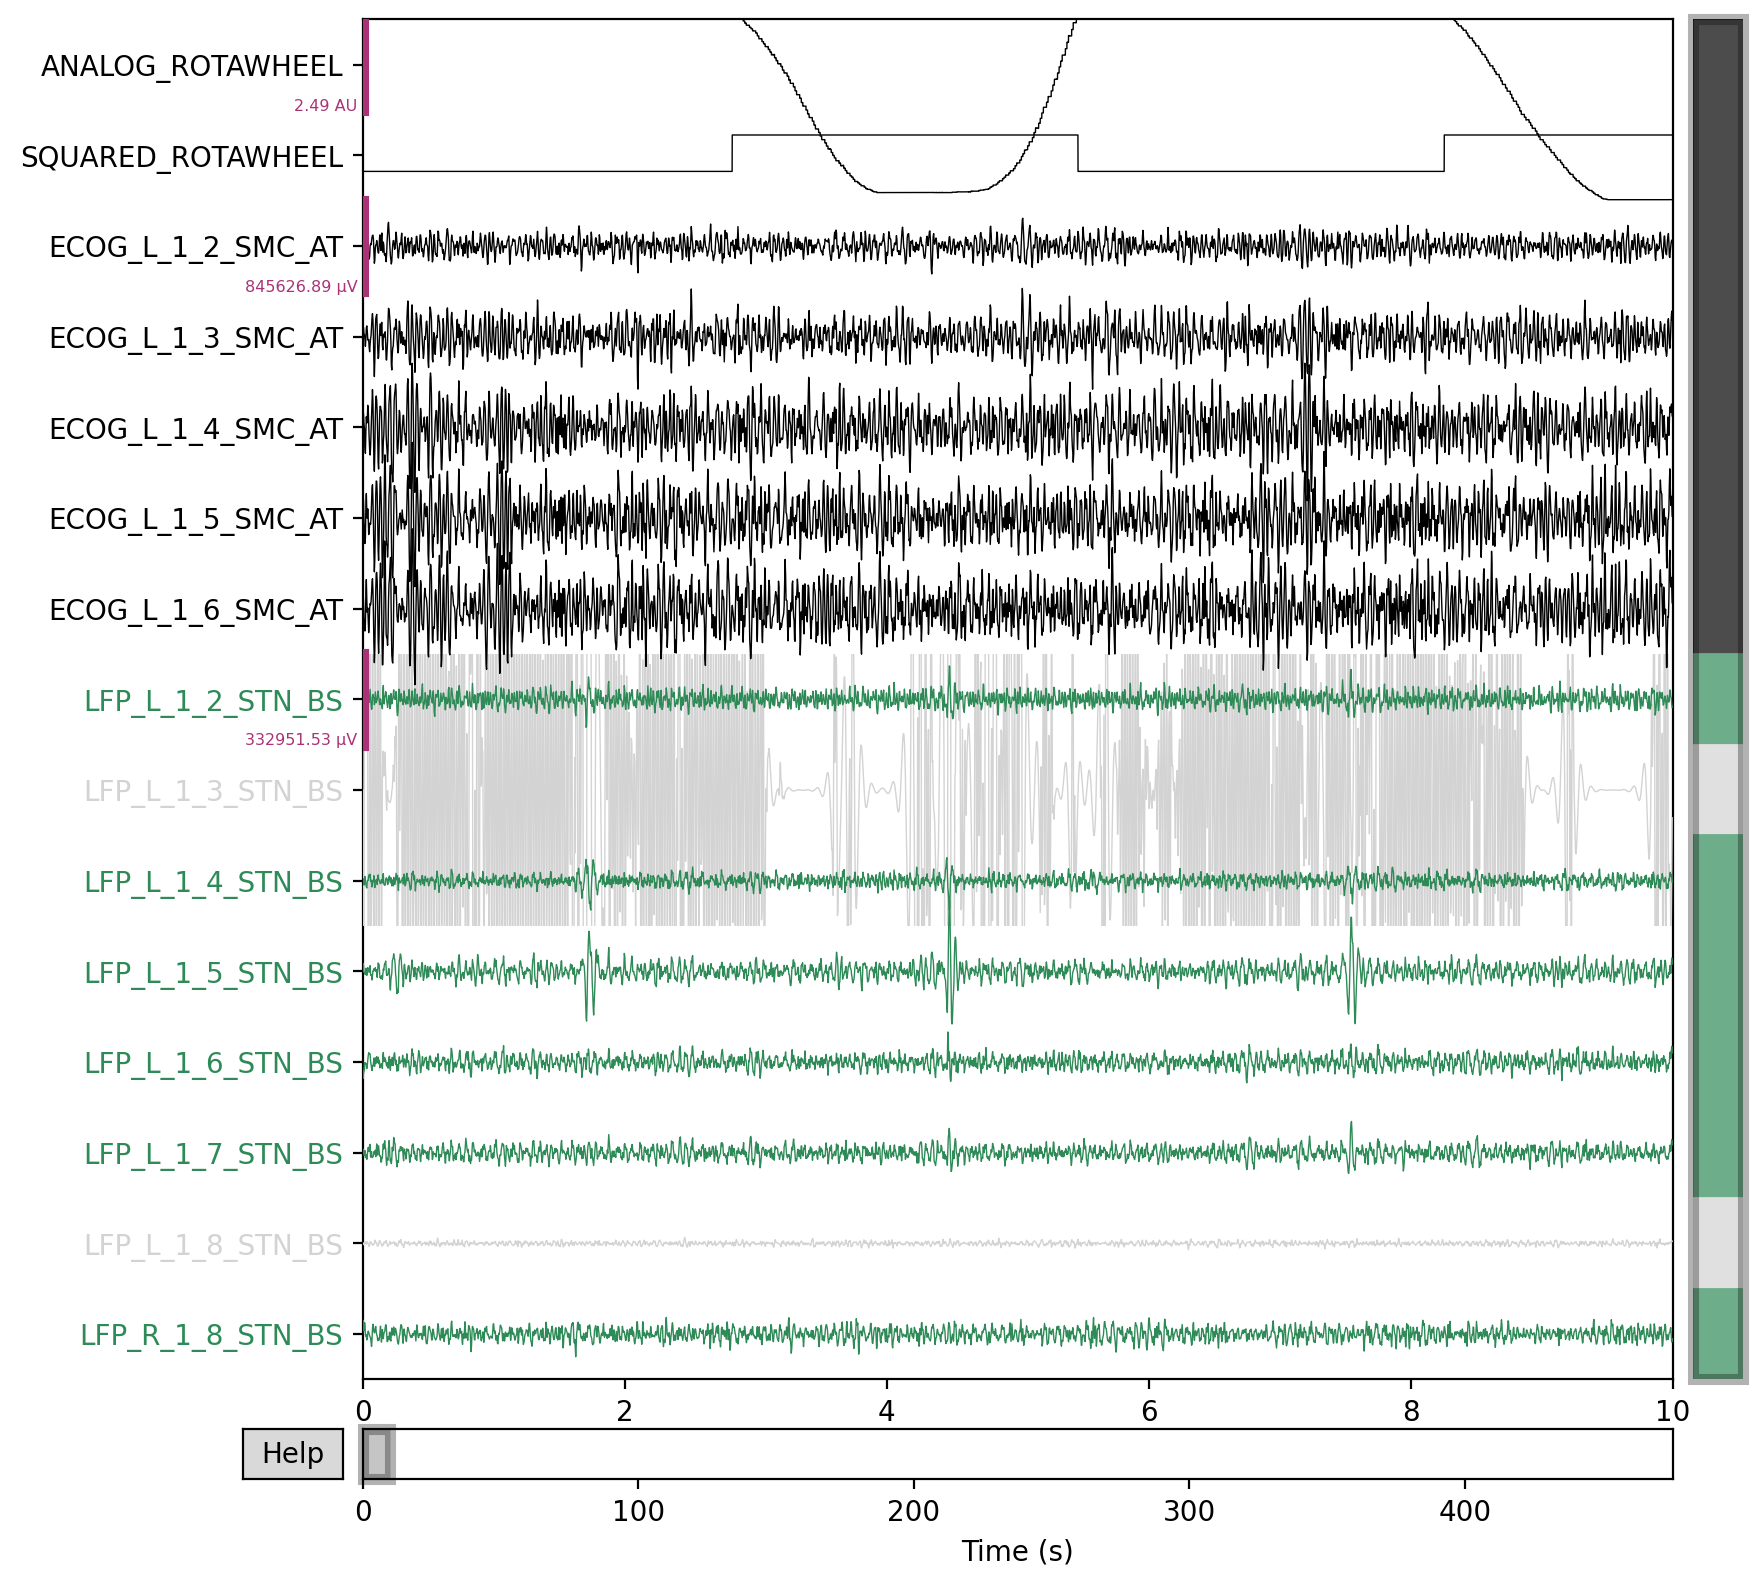

Channels marked as bad: ['LFP_L_1_3_STN_BS', 'LFP_L_1_8_STN_BS']


In [25]:
%matplotlib qt
raw.plot(scalings='auto', highpass=13, lowpass=90)

In [42]:
raw.load_data()

Reading 0 ... 578488  =      0.000 ...   420.561 secs...


<RawBrainVision | sub-002_ses-EphysMedOff03_task-SelfpacedRotationR_acq-StimOn_run-01_ieeg.eeg, 38 x 578489 (420.6 s), ~167.8 MB, data loaded>

In [43]:
raw = mne.set_eeg_reference(raw, ref_channels='average', ch_type='ecog')[0]

Applying average reference.
Applying a custom ('ECoG',) reference.


In [44]:
raw = raw.resample(sfreq=500)

In [45]:
freqs = np.arange(50, raw.info['sfreq'] / 2, 50)

In [46]:
raw = raw.notch_filter(freqs)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 sec)



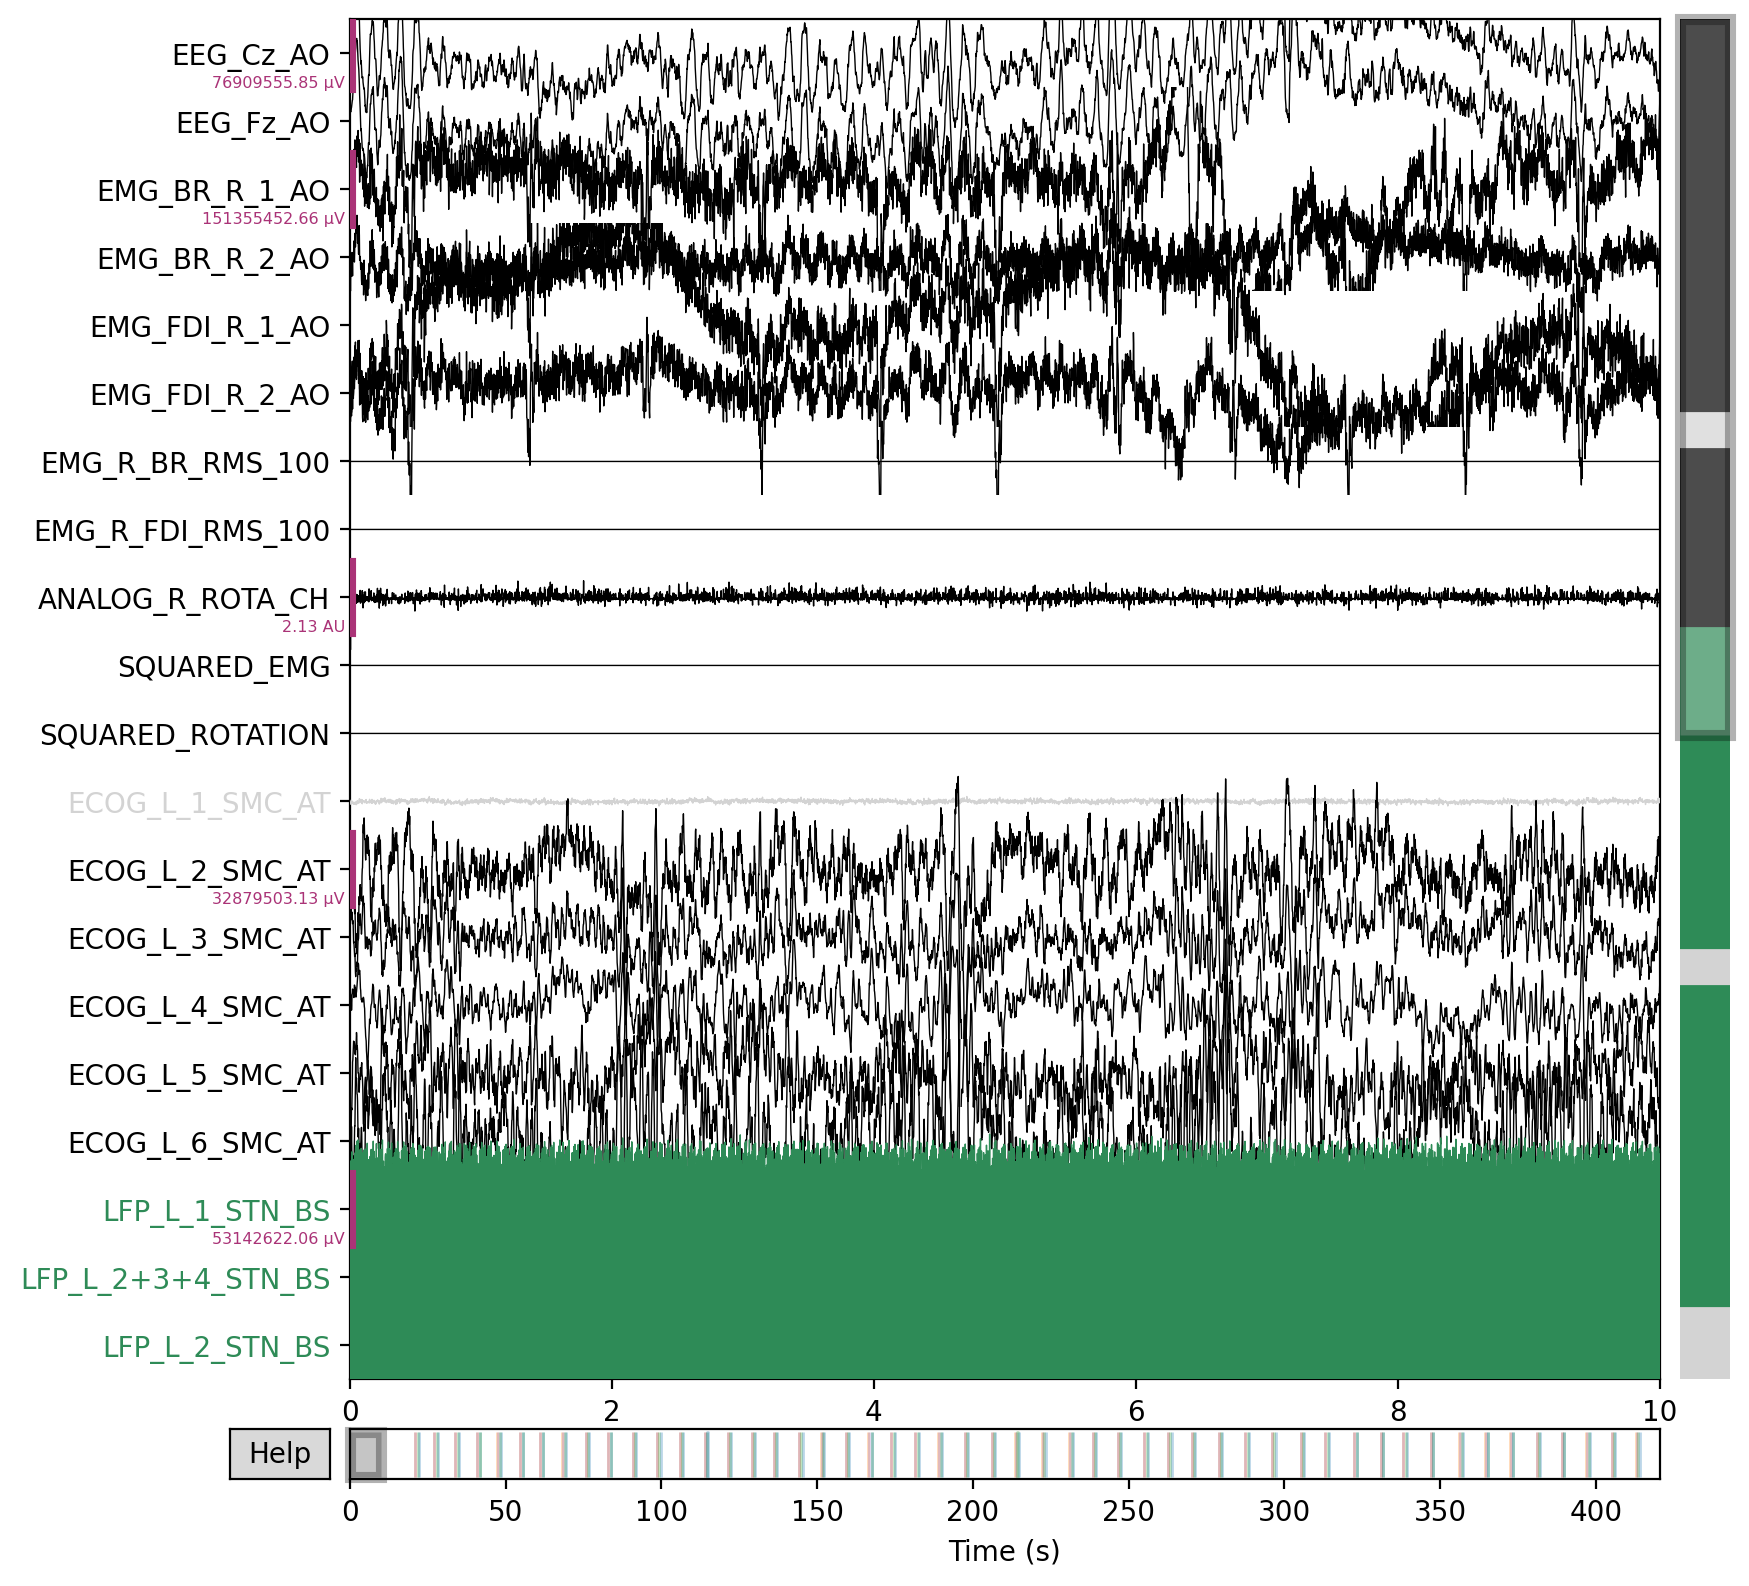

Channels marked as bad: ['ECOG_L_1_SMC_AT', 'LFP_L_8_STN_BS', 'LFP_R_8_STN_BS', 'LFP_R_8_STN_BS_REF']


In [47]:
raw.plot(scalings='auto')

In [48]:
events, event_id = mne.events_from_annotations(raw, event_id={"EMG_onset": 1})

Used Annotations descriptions: ['EMG_onset']


In [49]:
epochs = mne.Epochs(raw, events=events, tmin=-5, tmax=5, baseline=None)

Not setting metadata
Not setting metadata
51 matching events found
No baseline correction applied
0 projection items activated


In [50]:
epochs

Number of events,51
Events,1: 51
Time range,-5.000 – 5.000 sec
Baseline,off


Loading data for 51 events and 5001 original time points ...
0 bad epochs dropped
Loading data for 51 events and 5001 original time points ...
Loading data for 1 events and 5001 original time points ...


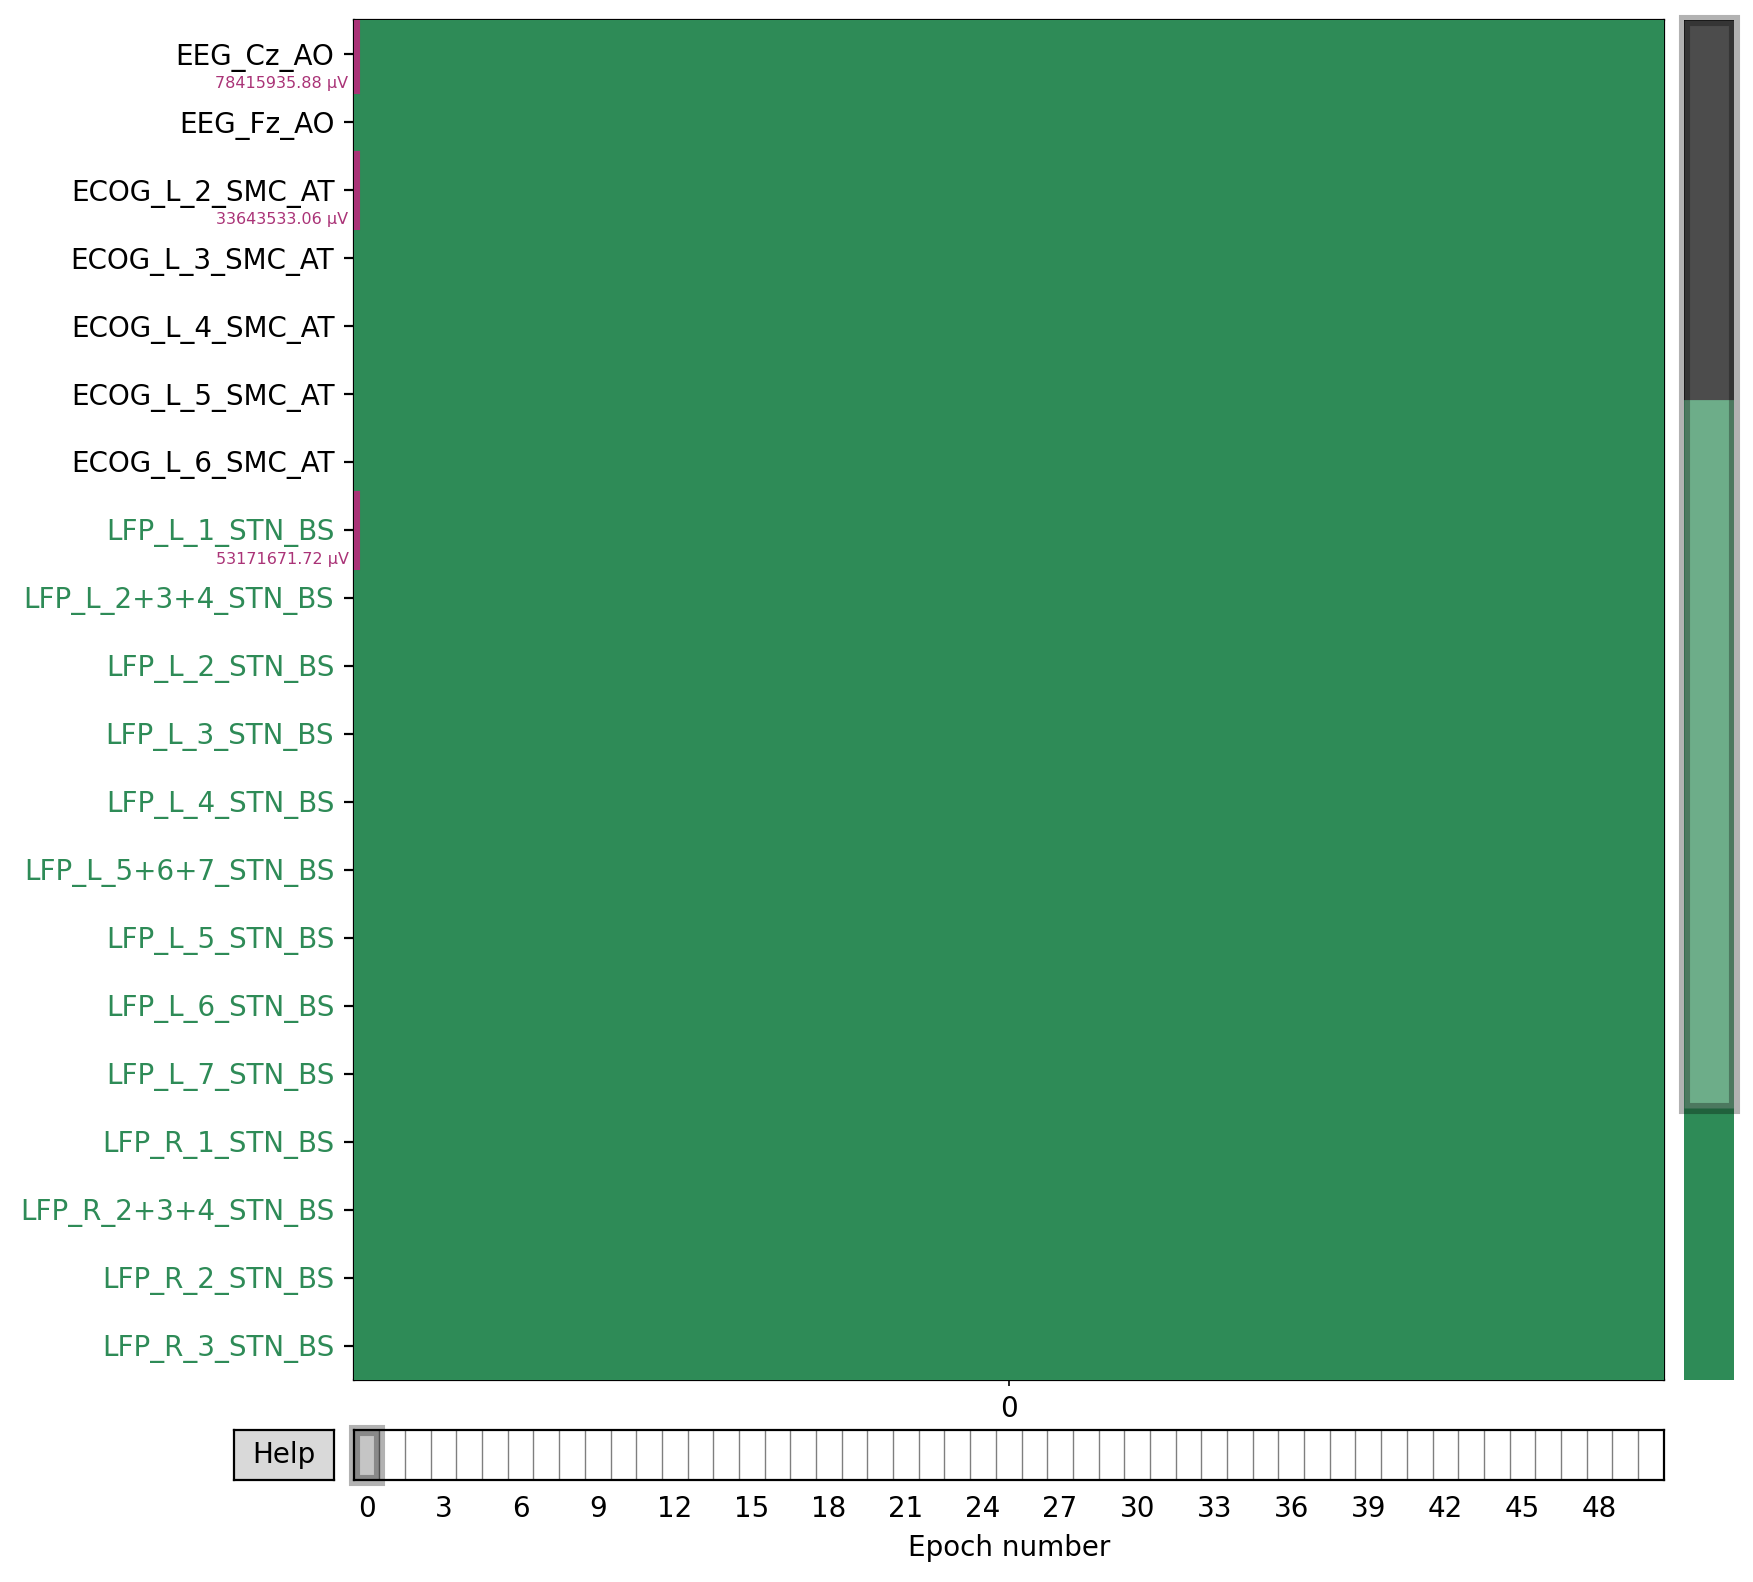

Loading data for 1 events and 5001 original time points ...
Loading data for 1 events and 5001 original time points ...
Loading data for 1 events and 5001 original time points ...
Loading data for 1 events and 5001 original time points ...
Loading data for 1 events and 5001 original time points ...
Loading data for 1 events and 5001 original time points ...
Loading data for 1 events and 5001 original time points ...
Loading data for 1 events and 5001 original time points ...
Loading data for 1 events and 5001 original time points ...
Loading data for 1 events and 5001 original time points ...
Loading data for 1 events and 5001 original time points ...
Loading data for 1 events and 5001 original time points ...
Loading data for 1 events and 5001 original time points ...
Loading data for 1 events and 5001 original time points ...
Loading data for 1 events and 5001 original time points ...
Loading data for 1 events and 5001 original time points ...
Loading data for 1 events and 5001 origi

C:\Users\richa\anaconda3\envs\pynm-decode\lib\site-packages\mne\viz\_mpl_figure.py:1779: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _cols = np.array([self.mne.epoch_color_bad,


Loading data for 1 events and 5001 original time points ...
Loading data for 1 events and 5001 original time points ...
Loading data for 1 events and 5001 original time points ...
Loading data for 1 events and 5001 original time points ...
Loading data for 1 events and 5001 original time points ...
Loading data for 1 events and 5001 original time points ...
Loading data for 1 events and 5001 original time points ...
Loading data for 1 events and 5001 original time points ...
Loading data for 1 events and 5001 original time points ...
Loading data for 1 events and 5001 original time points ...
Loading data for 1 events and 5001 original time points ...
Loading data for 1 events and 5001 original time points ...
Loading data for 1 events and 5001 original time points ...
Loading data for 1 events and 5001 original time points ...
Loading data for 1 events and 5001 original time points ...
Loading data for 1 events and 5001 original time points ...
Loading data for 1 events and 5001 origi

In [51]:
epochs.plot(scalings='auto', n_epochs=1)

In [53]:
freqs = np.arange(1, 100)
n_cycles = 5

In [54]:
power = mne.time_frequency.tfr_morlet(
    epochs, 
    freqs=freqs, 
    n_cycles=n_cycles, 
    return_itc=False, 
    picks='ecog', 
    n_jobs=-1
)

Loading data for 50 events and 5001 original time points ...


In [60]:
power.ch_names

['ECOG_L_2_SMC_AT',
 'ECOG_L_3_SMC_AT',
 'ECOG_L_4_SMC_AT',
 'ECOG_L_5_SMC_AT',
 'ECOG_L_6_SMC_AT']

Applying baseline correction (mode: zscore)


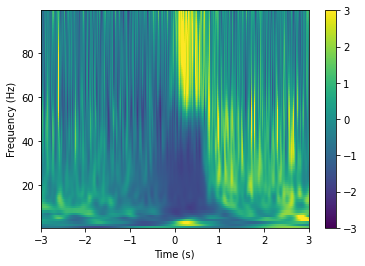

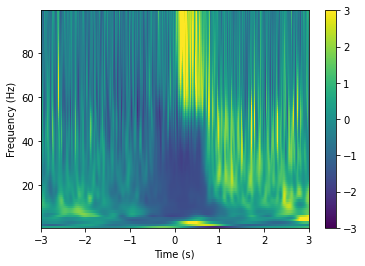

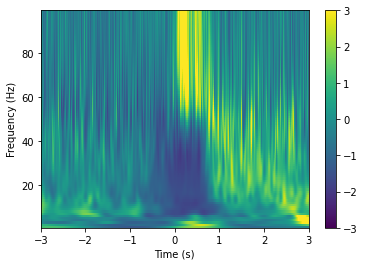

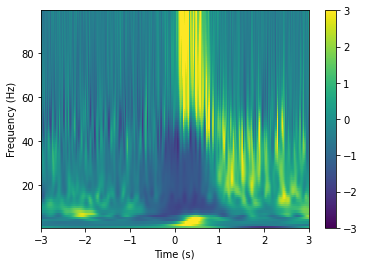

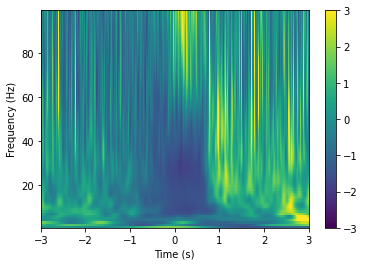

[<Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>]

In [57]:
%matplotlib inline
power.plot(
    cmap="viridis", 
    baseline=(-3, 3), 
    mode="zscore", 
    tmin=-3, 
    tmax=3., 
    vmin=-3, 
    vmax=3.
)